# EDA

In [42]:
import pandas as pd
import re
import string

# Load the dataset
df = pd.read_csv('/content/samsum-train.csv')

# Function to preprocess text and tokenize
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
        tokens = text.split() # Split text into tokens
        # Add more preprocessing steps as needed (e.g., remove numbers, remove stopwords, stemming/lemmatization)
        return tokens
    else:
        return [] # Return an empty list for non-string values

# Apply preprocessing to the 'dialogue' column
df['preprocessed_dialogue'] = df['dialogue'].apply(preprocess_text)

# Display the first few rows with the new column
display(df[['dialogue', 'preprocessed_dialogue']].head())

,dialogue,preprocessed_dialogue
0,Amanda: I baked cookies. Do you want some?\r\...,"[amanda, i, baked, cookies, do, you, want, som..."
1,Olivia: Who are you voting for in this electio...,"[olivia, who, are, you, voting, for, in, this,..."
2,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...","[tim, hi, whats, up, kim, bad, mood, tbh, i, w..."
3,"Edward: Rachel, I think I'm in ove with Bella....","[edward, rachel, i, think, im, in, ove, with, ..."
4,Sam: hey overheard rick say something\r\nSam:...,"[sam, hey, overheard, rick, say, something, sa..."


In [43]:
# Print the first few preprocessed dialogues individually
for i in range(5):
    print(f"Entry {i+1}:\nOriginal:\n{df['dialogue'][i]}\nPreprocessed:\n{df['preprocessed_dialogue'][i]}\n---")

Entry 1:
Original:
Amanda: I baked  cookies. Do you want some?
Jerry: Sure!
Amanda: I'll bring you tomorrow :-)
Preprocessed:
['amanda', 'i', 'baked', 'cookies', 'do', 'you', 'want', 'some', 'jerry', 'sure', 'amanda', 'ill', 'bring', 'you', 'tomorrow']
---
Entry 2:
Original:
Olivia: Who are you voting for in this election? 
Oliver: Liberals as always.
Olivia: Me too!!
Oliver: Great
Preprocessed:
['olivia', 'who', 'are', 'you', 'voting', 'for', 'in', 'this', 'election', 'oliver', 'liberals', 'as', 'always', 'olivia', 'me', 'too', 'oliver', 'great']
---
Entry 3:
Original:
Tim: Hi, what's up?
Kim: Bad mood tbh, I was going to do lots of stuff but ended up procrastinating
Tim: What did you plan on doing?
Kim: Oh you know, uni stuff and unfucking my room
Kim: Maybe tomorrow I'll move my ass and do everything
Kim: We were going to defrost a fridge so instead of shopping I'll eat some defrosted veggies
Tim: For doing stuff I recommend Pomodoro technique where u use breaks for doing chores
Tim

In [44]:
from collections import Counter

# Flatten the list of lists into a single list of tokens
all_tokens = [token for sublist in df['preprocessed_dialogue'] for token in sublist]

# Calculate total token count
total_tokens = len(all_tokens)
print(f"Total number of tokens: {total_tokens}")

# Calculate unique token count
unique_tokens = len(set(all_tokens))
print(f"Number of unique tokens: {unique_tokens}")

# Identify the most frequent tokens
token_counts = Counter(all_tokens)
most_common_tokens = token_counts.most_common(20) # Get the top 20 most common tokens
print("\nMost common tokens (Top 20):")
for token, count in most_common_tokens:
    print(f"{token}: {count}")

Total number of tokens: 1369284
Number of unique tokens: 33487

Most common tokens (Top 20):
i: 44143
you: 39048
the: 31562
to: 29202
a: 22256
it: 20381
and: 17727
for: 11984
in: 11561
is: 11334
that: 10871
have: 10779
of: 10766
so: 10469
but: 10187
me: 10162
be: 9172
what: 8675
im: 8666
we: 8650


In [45]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

# Apply the function to the 'preprocessed_dialogue' column
df['tokens_without_stopwords'] = df['preprocessed_dialogue'].apply(remove_stopwords)

# Display the first few rows with the new column
display(df[['preprocessed_dialogue', 'tokens_without_stopwords']].head())

,preprocessed_dialogue,tokens_without_stopwords
0,"[amanda, i, baked, cookies, do, you, want, som...","[amanda, baked, cookies, want, jerry, sure, am..."
1,"[olivia, who, are, you, voting, for, in, this,...","[olivia, voting, election, oliver, liberals, a..."
2,"[tim, hi, whats, up, kim, bad, mood, tbh, i, w...","[tim, hi, whats, kim, bad, mood, tbh, going, l..."
3,"[edward, rachel, i, think, im, in, ove, with, ...","[edward, rachel, think, im, ove, bella, rachel..."
4,"[sam, hey, overheard, rick, say, something, sa...","[sam, hey, overheard, rick, say, something, sa..."


In [46]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download the 'wordnet', 'omw-1.4', and 'averaged_perceptron_tagger_eng' corpora if not already downloaded
try:
    wordnet.synsets('test')
except LookupError:
    nltk.download('wordnet')
    nltk.download('omw-1.4')

try:
    nltk.pos_tag(['test'])
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')


# Instantiate a WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to get the part-of-speech tag for lemmatization
def get_wordnet_pos(word):
    """Map POS tags to first character used by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Define a function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return lemmatized_tokens

# Apply the lemmatization function to the 'tokens_without_stopwords' column
df['lemmatized_tokens'] = df['tokens_without_stopwords'].apply(lemmatize_tokens)

# Display the head of the DataFrame
display(df[['tokens_without_stopwords', 'lemmatized_tokens']].head())

,tokens_without_stopwords,lemmatized_tokens
0,"[amanda, baked, cookies, want, jerry, sure, am...","[amanda, bake, cooky, want, jerry, sure, amand..."
1,"[olivia, voting, election, oliver, liberals, a...","[olivia, voting, election, oliver, liberal, al..."
2,"[tim, hi, whats, kim, bad, mood, tbh, going, l...","[tim, hi, whats, kim, bad, mood, tbh, go, lot,..."
3,"[edward, rachel, think, im, ove, bella, rachel...","[edward, rachel, think, im, ove, bella, rachel..."
4,"[sam, hey, overheard, rick, say, something, sa...","[sam, hey, overheard, rick, say, something, sa..."


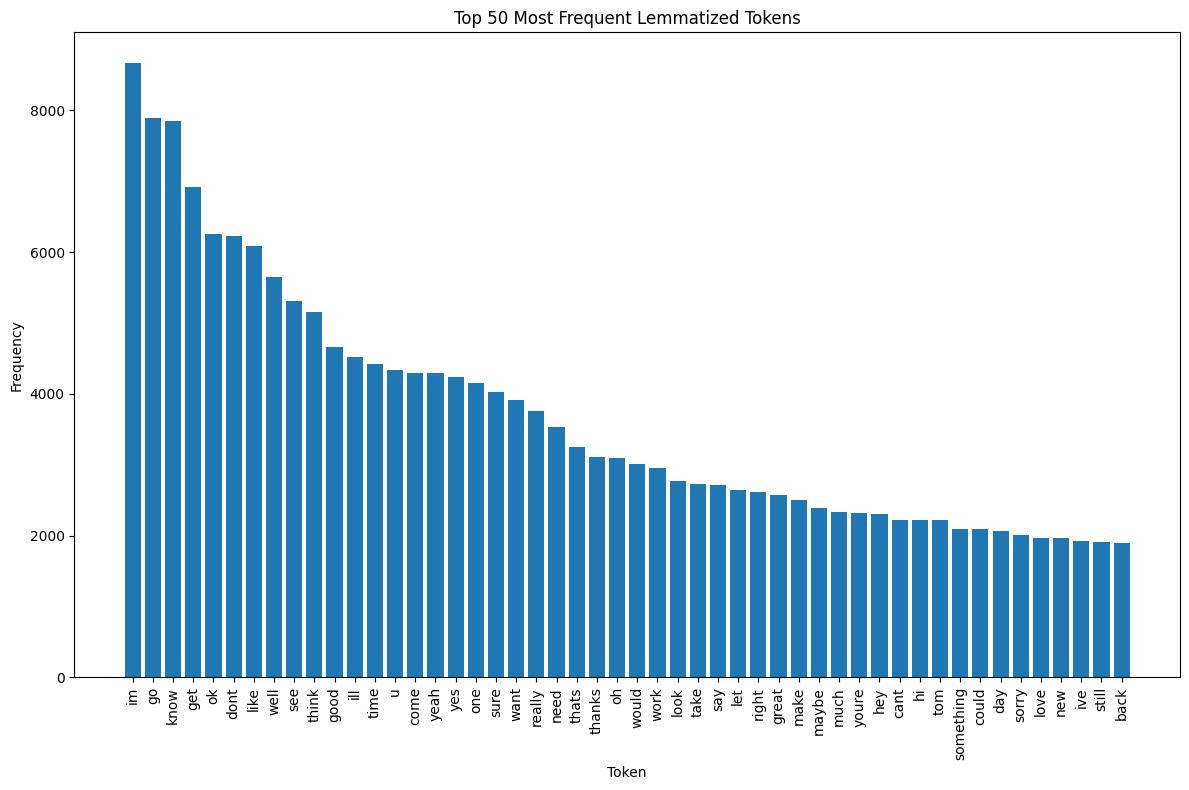

In [47]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Flatten the list of lemmatized tokens
all_lemmatized_tokens = [token for sublist in df['lemmatized_tokens'] for token in sublist]

# Count the occurrences of each token
token_counts = Counter(all_lemmatized_tokens)

# Get the top 50 most common tokens and their frequencies
most_common_tokens = token_counts.most_common(50)

# Create a pandas DataFrame
most_common_df = pd.DataFrame(most_common_tokens, columns=['token', 'frequency'])

# Sort the DataFrame by frequency in descending order (already done by most_common but good practice)
most_common_df = most_common_df.sort_values(by='frequency', ascending=False)

# Create a bar plot of the token frequencies
plt.figure(figsize=(12, 8))
plt.bar(most_common_df['token'], most_common_df['frequency'])
plt.xticks(rotation=90)
plt.title('Top 50 Most Frequent Lemmatized Tokens')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

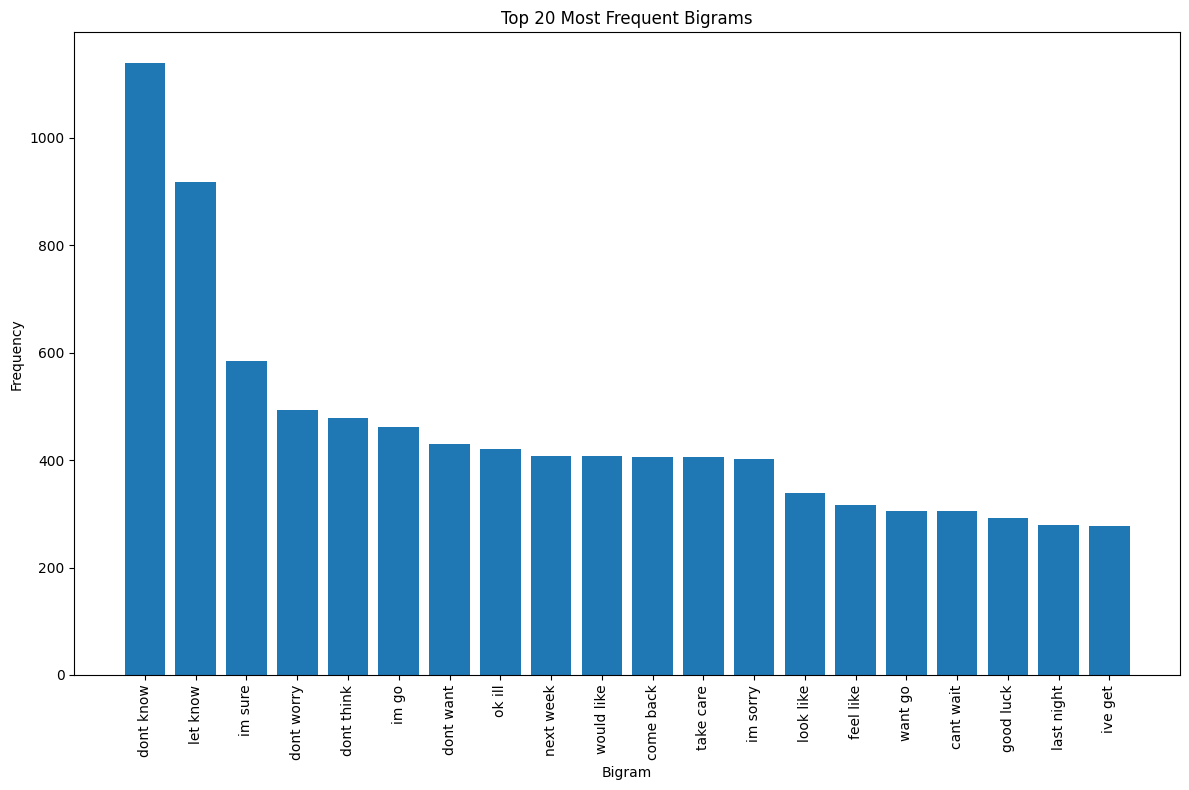

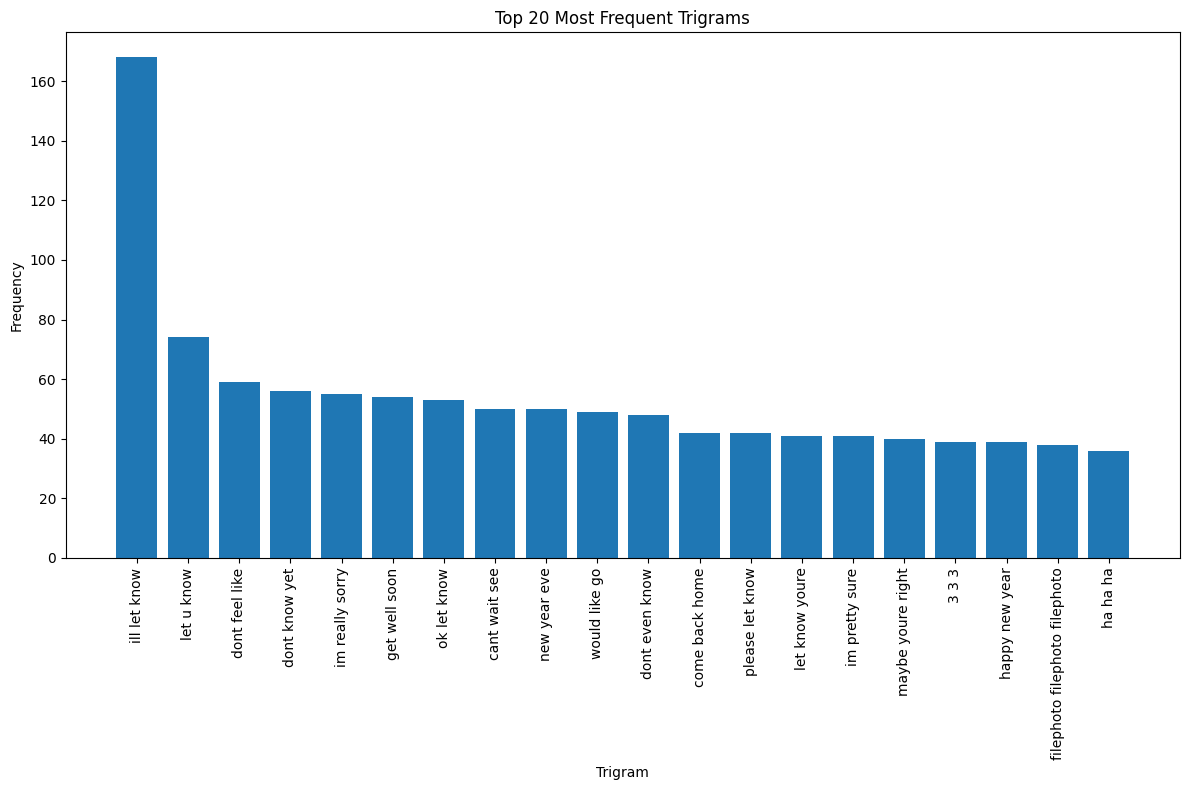

In [48]:
from nltk.util import ngrams
from nltk import FreqDist
import matplotlib.pyplot as plt
import pandas as pd

# Flatten the list of lists into a single list of tokens
all_lemmatized_tokens = [token for sublist in df['lemmatized_tokens'] for token in sublist]

# Generate bigrams
bigrams = list(ngrams(all_lemmatized_tokens, 2))

# Calculate frequency distribution of bigrams
bigram_freq_dist = FreqDist(bigrams)

# Get the 20 most common bigrams
most_common_bigrams = bigram_freq_dist.most_common(20)

# Create a pandas DataFrame for bigrams
bigram_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])
bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x)) # Join the bigram tuples into strings

# Create a bar plot for bigram frequencies
plt.figure(figsize=(12, 8))
plt.bar(bigram_df['Bigram'], bigram_df['Frequency'])
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Generate trigrams
trigrams = list(ngrams(all_lemmatized_tokens, 3))

# Calculate frequency distribution of trigrams
trigram_freq_dist = FreqDist(trigrams)

# Get the 20 most common trigrams
most_common_trigrams = trigram_freq_dist.most_common(20)

# Create a pandas DataFrame for trigrams
trigram_df = pd.DataFrame(most_common_trigrams, columns=['Trigram', 'Frequency'])
trigram_df['Trigram'] = trigram_df['Trigram'].apply(lambda x: ' '.join(x)) # Join the trigram tuples into strings

# Create a bar plot for trigram frequencies
plt.figure(figsize=(12, 8))
plt.bar(trigram_df['Trigram'], trigram_df['Frequency'])
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Trigrams')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [49]:
%pip install transformers

## Load bert tokenizer


In [6]:
from transformers import BertTokenizer

# Load a pre-trained BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

## Tokenize for bert


In [51]:
# Define a function to tokenize text using the BERT tokenizer
def tokenize_with_bert(text):
    if isinstance(text, str):
        # Encode the text using the BERT tokenizer
        # Set add_special_tokens=False to avoid adding [CLS] and [SEP] tokens
        encoded_input = bert_tokenizer.encode(text, add_special_tokens=False)
        # Convert the token IDs back to tokens
        tokens = bert_tokenizer.convert_ids_to_tokens(encoded_input)
        return tokens
    else:
        return [] # Return an empty list for non-string values

# Apply the function to the 'dialogue' column
df['bert_tokens'] = df['dialogue'].apply(tokenize_with_bert)

# Display the first few rows with the original dialogue and BERT tokens
display(df[['dialogue', 'bert_tokens']].head())

Token indices sequence length is longer than the specified maximum sequence length for this model (521 > 512). Running this sequence through the model will result in indexing errors


,dialogue,bert_tokens
0,Amanda: I baked cookies. Do you want some?\r\...,"[amanda, :, i, baked, cookies, ., do, you, wan..."
1,Olivia: Who are you voting for in this electio...,"[olivia, :, who, are, you, voting, for, in, th..."
2,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...","[tim, :, hi, ,, what, ', s, up, ?, kim, :, bad..."
3,"Edward: Rachel, I think I'm in ove with Bella....","[edward, :, rachel, ,, i, think, i, ', m, in, ..."
4,Sam: hey overheard rick say something\r\nSam:...,"[sam, :, hey, overheard, rick, say, something,..."


## Analyze bert token frequency


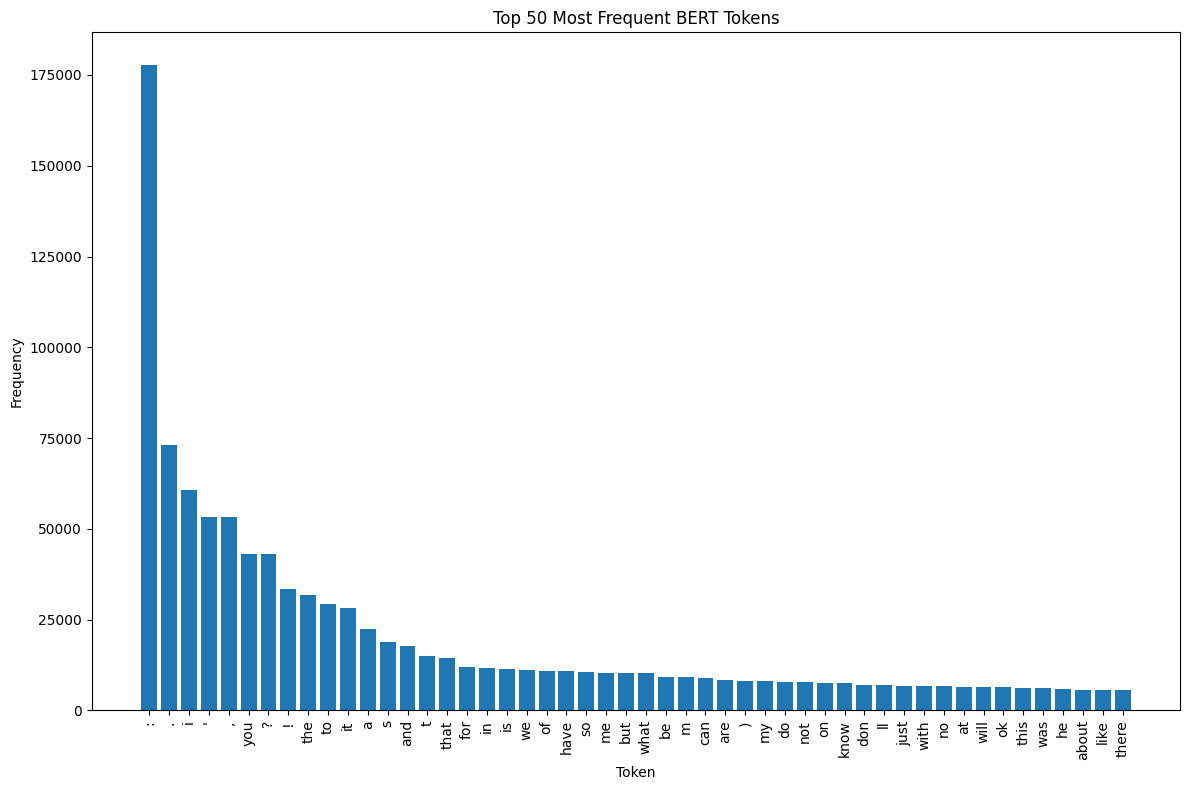

In [52]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Flatten the list of BERT tokens
all_bert_tokens = [token for sublist in df['bert_tokens'] for token in sublist]

# Count the occurrences of each token
bert_token_counts = Counter(all_bert_tokens)

# Get the top 50 most common BERT tokens and their frequencies
most_common_bert_tokens = bert_token_counts.most_common(50)

# Create a pandas DataFrame
most_common_bert_df = pd.DataFrame(most_common_bert_tokens, columns=['token', 'frequency'])

# Sort the DataFrame by frequency in descending order (already done by most_common but good practice)
most_common_bert_df = most_common_bert_df.sort_values(by='frequency', ascending=False)

# Create a bar plot of the BERT token frequencies
plt.figure(figsize=(12, 8))
plt.bar(most_common_bert_df['token'], most_common_bert_df['frequency'])
plt.xticks(rotation=90)
plt.title('Top 50 Most Frequent BERT Tokens')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

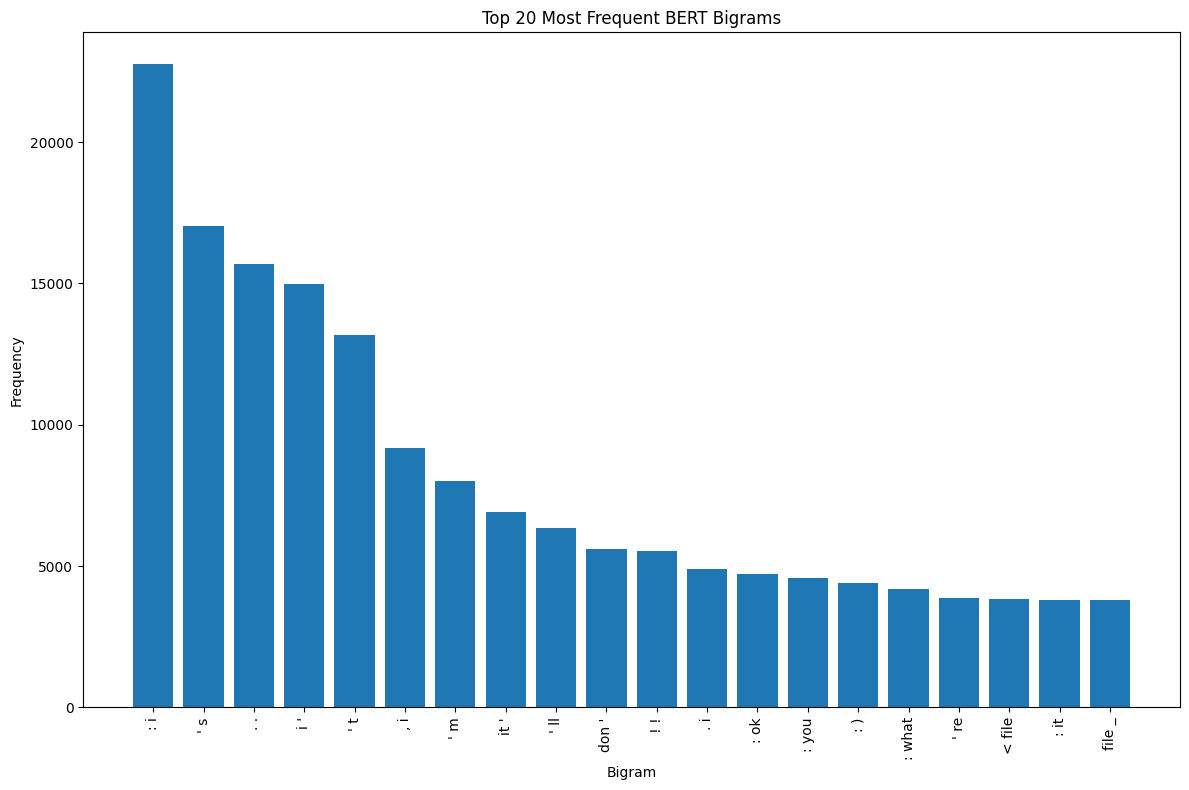

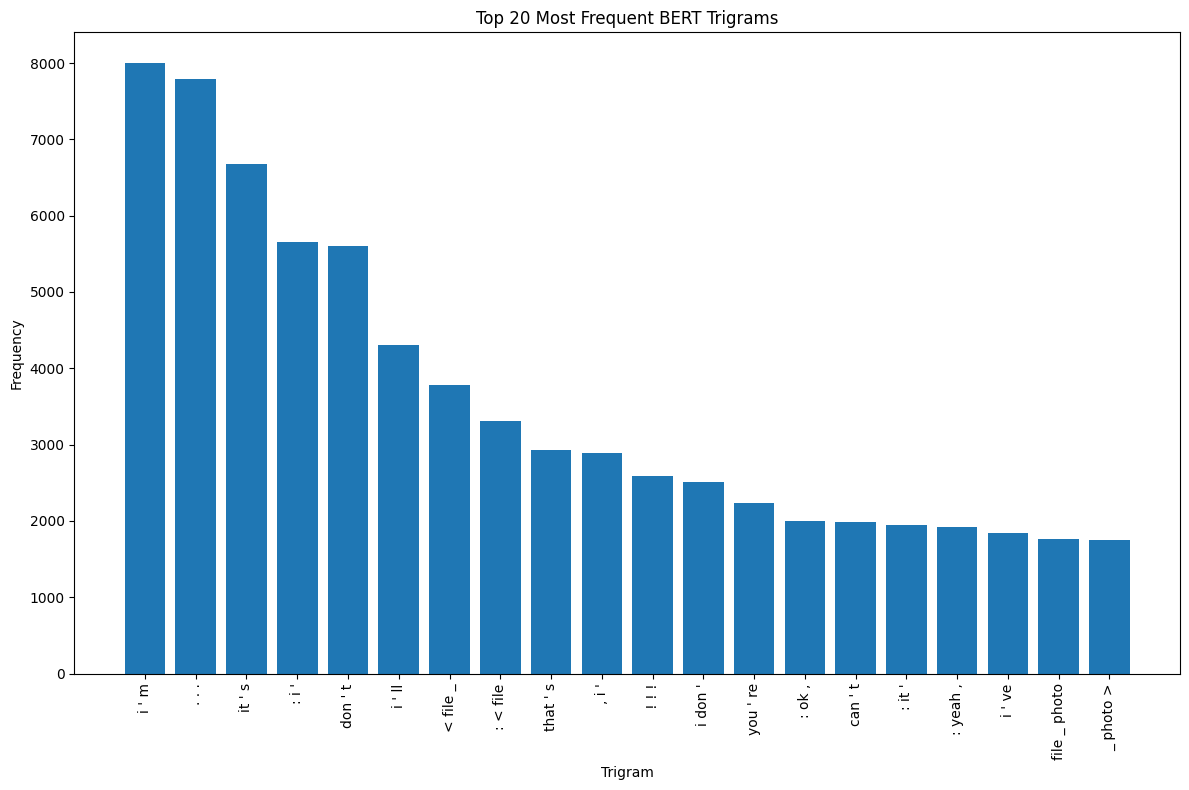

In [53]:
from nltk.util import ngrams
from nltk import FreqDist
import matplotlib.pyplot as plt
import pandas as pd

# Flatten the list of lists into a single list of BERT tokens
all_bert_tokens = [token for sublist in df['bert_tokens'] for token in sublist]

# Generate bigrams for BERT tokens
bert_bigrams = list(ngrams(all_bert_tokens, 2))

# Calculate frequency distribution of BERT bigrams
bert_bigram_freq_dist = FreqDist(bert_bigrams)

# Get the 20 most common BERT bigrams
most_common_bert_bigrams = bert_bigram_freq_dist.most_common(20)

# Create a pandas DataFrame for BERT bigrams
bert_bigram_df = pd.DataFrame(most_common_bert_bigrams, columns=['Bigram', 'Frequency'])
bert_bigram_df['Bigram'] = bert_bigram_df['Bigram'].apply(lambda x: ' '.join(x)) # Join the bigram tuples into strings

# Create a bar plot for BERT bigram frequencies
plt.figure(figsize=(12, 8))
plt.bar(bert_bigram_df['Bigram'], bert_bigram_df['Frequency'])
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent BERT Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Generate trigrams for BERT tokens
bert_trigrams = list(ngrams(all_bert_tokens, 3))

# Calculate frequency distribution of BERT trigrams
bert_trigram_freq_dist = FreqDist(bert_trigrams)

# Get the 20 most common BERT trigrams
most_common_bert_trigrams = bert_trigram_freq_dist.most_common(20)

# Create a pandas DataFrame for BERT trigrams
bert_trigram_df = pd.DataFrame(most_common_bert_trigrams, columns=['Trigram', 'Frequency'])
bert_trigram_df['Trigram'] = bert_trigram_df['Trigram'].apply(lambda x: ' '.join(x)) # Join the trigram tuples into strings

# Create a bar plot for BERT trigram frequencies
plt.figure(figsize=(12, 8))
plt.bar(bert_trigram_df['Trigram'], bert_trigram_df['Frequency'])
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent BERT Trigrams')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Load gpt-2 tokenizer


In [1]:
from transformers import GPT2Tokenizer

# Load a pre-trained GPT-2 tokenizer
gpt2_tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

## Tokenize for gpt-2


In [68]:
# Define a function to tokenize text using the GPT-2 tokenizer
def tokenize_with_gpt2(text):
    if isinstance(text, str):
        # Encode the text using the GPT-2 tokenizer
        # Set add_special_tokens=False to avoid adding special tokens
        encoded_input = gpt2_tokenizer.encode(text, add_special_tokens=False)
        # Convert the token IDs back to tokens
        tokens = gpt2_tokenizer.convert_ids_to_tokens(encoded_input)
        return tokens
    else:
        return [] # Return an empty list for non-string values

# Apply the function to the 'dialogue' column
df['gpt2_tokens'] = df['dialogue'].apply(tokenize_with_gpt2)

# Display the first few rows with the original dialogue and GPT-2 tokens
display(df[['dialogue', 'gpt2_tokens']].head())

Token indices sequence length is longer than the specified maximum sequence length for this model (1079 > 1024). Running this sequence through the model will result in indexing errors


,dialogue,gpt2_tokens
0,Amanda: I baked cookies. Do you want some?\r\...,"[Am, anda, :, ĠI, Ġbaked, Ġ, Ġcookies, ., ĠDo,..."
1,Olivia: Who are you voting for in this electio...,"[O, liv, ia, :, ĠWho, Ġare, Ġyou, Ġvoting, Ġfo..."
2,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...","[Tim, :, ĠHi, ,, Ġwhat, 's, Ġup, ?, č, Ċ, Kim,..."
3,"Edward: Rachel, I think I'm in ove with Bella....","[Edward, :, ĠRachel, ,, ĠI, Ġthink, ĠI, 'm, Ġi..."
4,Sam: hey overheard rick say something\r\nSam:...,"[Sam, :, Ġhey, Ġ, Ġoverheard, Ġr, ick, Ġsay, Ġ..."


## Analyze gpt-2 token frequency


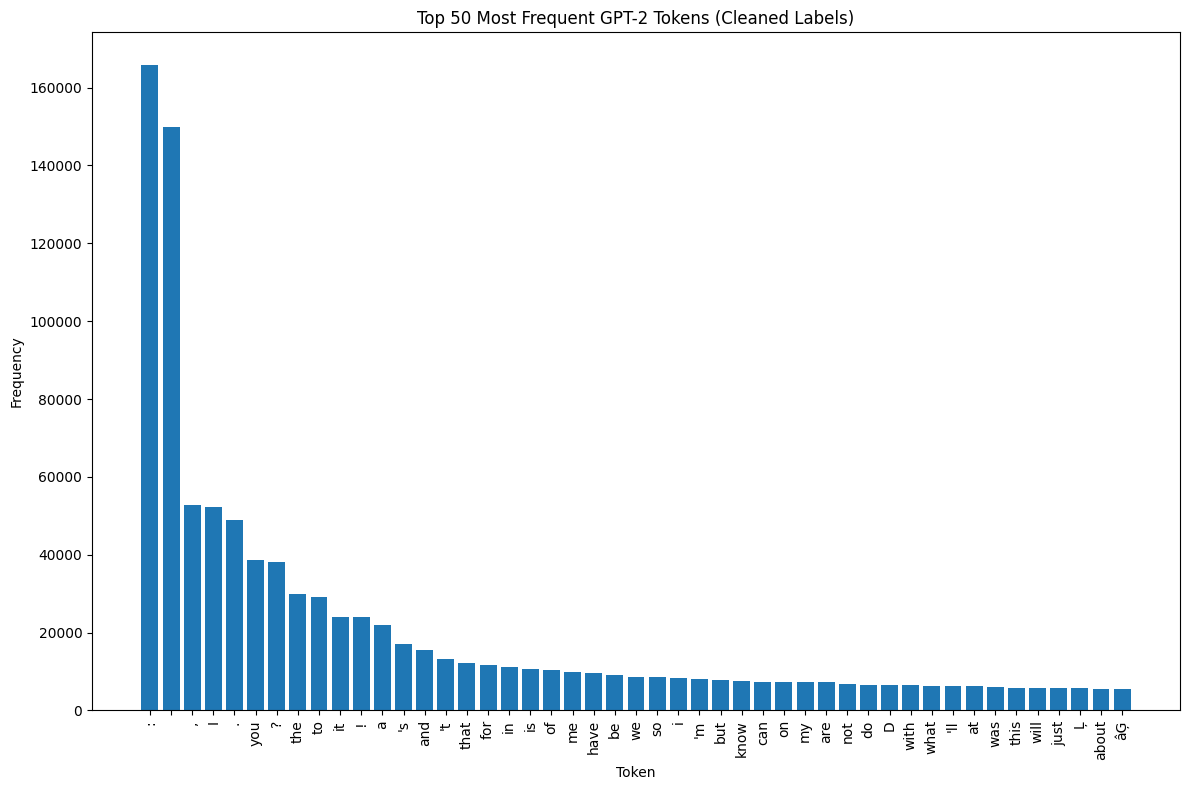

In [69]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Flatten the list of GPT-2 tokens
all_gpt2_tokens = [token for sublist in df['gpt2_tokens'] for token in sublist]

# Count the occurrences of each token
gpt2_token_counts = Counter(all_gpt2_tokens)

# Get the top 50 most common GPT-2 tokens and their frequencies
most_common_gpt2_tokens = gpt2_token_counts.most_common(50)

# Create a pandas DataFrame
most_common_gpt2_df = pd.DataFrame(most_common_gpt2_tokens, columns=['token', 'frequency'])

# Clean up the tokens by removing special characters
most_common_gpt2_df['token'] = most_common_gpt2_df['token'].str.replace('Ġ', '').str.replace('Ċ', '').str.replace('č', '')


# Sort the DataFrame by frequency in descending order (already done by most_common but good practice)
most_common_gpt2_df = most_common_gpt2_df.sort_values(by='frequency', ascending=False)

# Create a bar plot of the GPT-2 token frequencies
plt.figure(figsize=(12, 8))
plt.bar(most_common_gpt2_df['token'], most_common_gpt2_df['frequency'])
plt.xticks(rotation=90)
plt.title('Top 50 Most Frequent GPT-2 Tokens (Cleaned Labels)')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

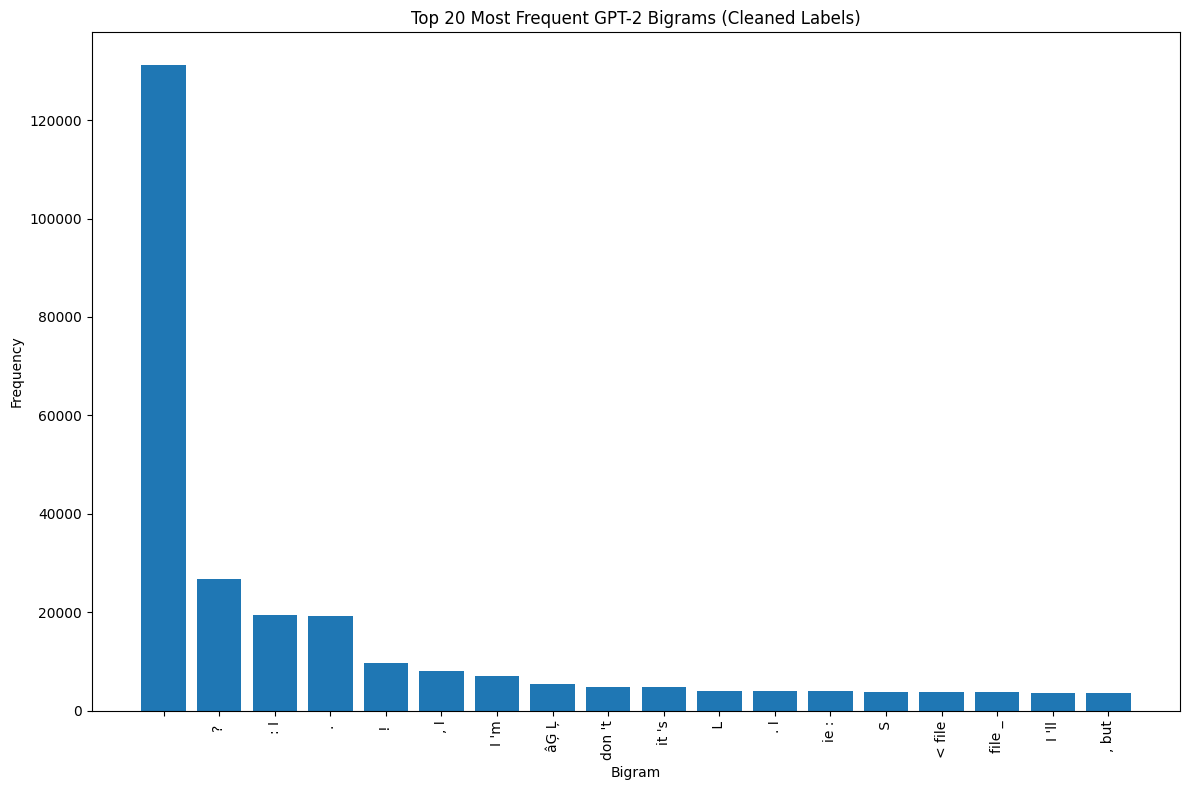

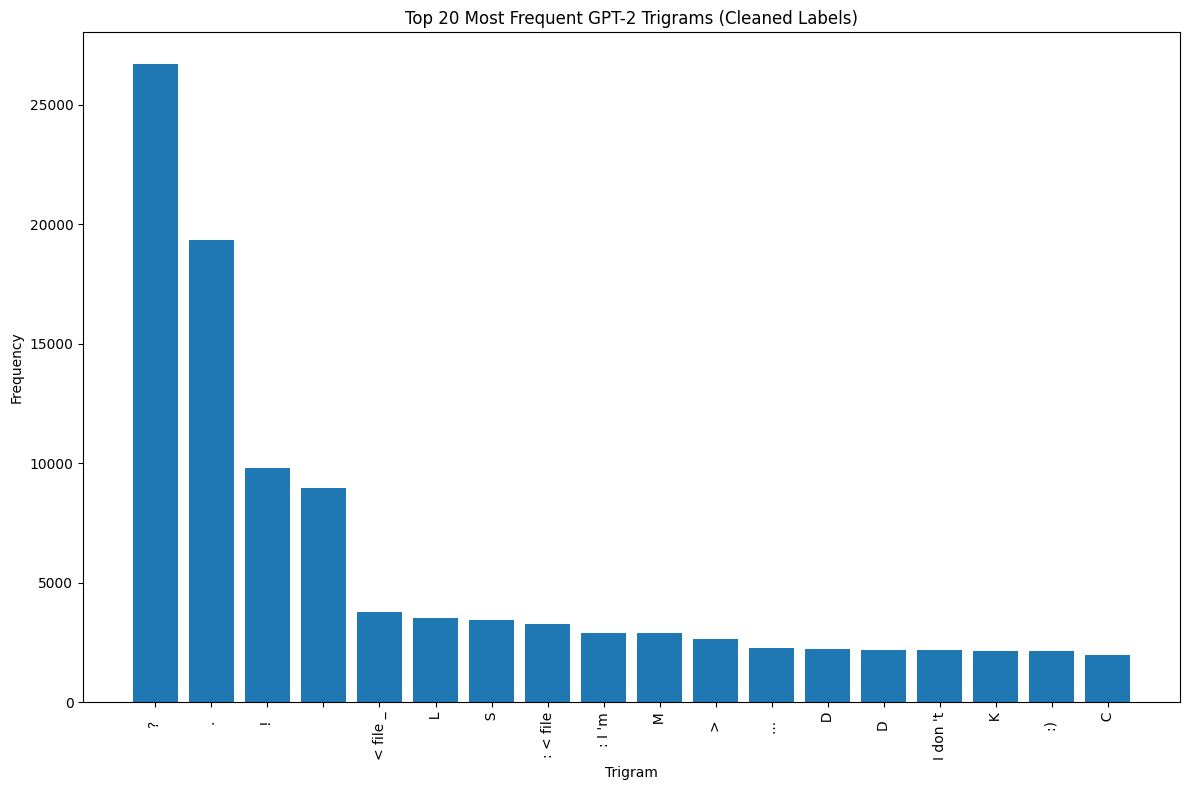

In [70]:
from nltk.util import ngrams
from nltk import FreqDist
import matplotlib.pyplot as plt
import pandas as pd

# Flatten the list of lists into a single list of GPT-2 tokens
all_gpt2_tokens = [token for sublist in df['gpt2_tokens'] for token in sublist]

# Generate bigrams for GPT-2 tokens
gpt2_bigrams = list(ngrams(all_gpt2_tokens, 2))

# Calculate frequency distribution of GPT-2 bigrams
gpt2_bigram_freq_dist = FreqDist(gpt2_bigrams)

# Get the 20 most common GPT-2 bigrams
most_common_gpt2_bigrams = gpt2_bigram_freq_dist.most_common(20)

# Create a pandas DataFrame for GPT-2 bigrams
gpt2_bigram_df = pd.DataFrame(most_common_gpt2_bigrams, columns=['Bigram', 'Frequency'])
# Clean up the tokens by removing special characters before joining
gpt2_bigram_df['Bigram'] = gpt2_bigram_df['Bigram'].apply(lambda x: ' '.join([token.replace('Ġ', '').replace('Ċ', '').replace('č', '') for token in x]))


# Create a bar plot for GPT-2 bigram frequencies
plt.figure(figsize=(12, 8))
plt.bar(gpt2_bigram_df['Bigram'], gpt2_bigram_df['Frequency'])
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent GPT-2 Bigrams (Cleaned Labels)')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Generate trigrams for GPT-2 tokens
gpt2_trigrams = list(ngrams(all_gpt2_tokens, 3))

# Calculate frequency distribution of GPT-2 trigrams
gpt2_trigram_freq_dist = FreqDist(gpt2_trigrams)

# Get the 20 most common GPT-2 trigrams
most_common_gpt2_trigrams = gpt2_trigram_freq_dist.most_common(20)

# Create a pandas DataFrame for GPT-2 trigrams
gpt2_trigram_df = pd.DataFrame(most_common_gpt2_trigrams, columns=['Trigram', 'Frequency'])
# Clean up the tokens by removing special characters before joining
gpt2_trigram_df['Trigram'] = gpt2_trigram_df['Trigram'].apply(lambda x: ' '.join([token.replace('Ġ', '').replace('Ċ', '').replace('č', '') for token in x]))


# Create a bar plot for GPT-2 trigram frequencies
plt.figure(figsize=(12, 8))
plt.bar(gpt2_trigram_df['Trigram'], gpt2_trigram_df['Frequency'])
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent GPT-2 Trigrams (Cleaned Labels)')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Compare tokenizations

### Subtask:
Discuss the differences observed in tokenization and token frequencies between the original preprocessing, BERT tokenization, and GPT-2 tokenization.


## Summary:

### Data Analysis Key Findings

*   The analysis successfully loaded and utilized both BERT and GPT-2 tokenizers from the `transformers` library.
*   BERT tokenization generated sub-word units, and the top 50 most frequent BERT tokens included common words and punctuation.
*   GPT-2 tokenization also produced sub-word units, and the top 50 most frequent GPT-2 tokens displayed a different distribution and token types compared to BERT and the original tokenization.
*   Significant differences were observed in the resulting tokens and their frequencies when comparing the original preprocessing (word-level) with BERT and GPT-2 tokenizations (sub-word level), highlighting the distinct approaches of these tokenizers.

### Insights or Next Steps

*   The difference in tokenization strategies (word vs. sub-word) significantly impacts the vocabulary size and token distribution. For downstream tasks, the choice of tokenizer should align with the model architecture being used (e.g., BERT for BERT-based models, GPT-2 for GPT-like models).
*   Further analysis could involve comparing the percentage of out-of-vocabulary tokens for each method or evaluating the impact of these different tokenizations on a specific NLP task such as text summarization.


## Set up Training Validation and Tests Data Sets

In [7]:
import pandas as pd

# Load the validation dataset
eval_df = pd.read_csv('/content/samsum-validation.csv')

# Load the test dataset
test_df = pd.read_csv('/content/samsum-test.csv')

# Use the already loaded training dataset (df)
train_df = pd.read_csv('/content/samsum-train.csv')

# Display the first few rows of each dataframe to verify
print("Training dataset head:")
display(train_df.head())
print("\nEvaluation dataset head:")
display(eval_df.head())
print("\nTest dataset head:")
display(test_df.head())

Training dataset head:


,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com..."



Evaluation dataset head:


,id,dialogue,summary
0,13817023,"A: Hi Tom, are you busy tomorrow’s afternoon?\...",A will go to the animal shelter tomorrow to ge...
1,13716628,Emma: I’ve just fallen in love with this adven...,Emma and Rob love the advent calendar. Lauren ...
2,13829420,Jackie: Madison is pregnant\r\nJackie: but she...,Madison is pregnant but she doesn't want to ta...
3,13819648,Marla: <file_photo>\r\nMarla: look what I foun...,Marla found a pair of boxers under her bed.
4,13728448,Robert: Hey give me the address of this music ...,Robert wants Fred to send him the address of t...



Test dataset head:


,id,dialogue,summary
0,13862856,"Hannah: Hey, do you have Betty's number?\nAman...",Hannah needs Betty's number but Amanda doesn't...
1,13729565,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...,Eric and Rob are going to watch a stand-up on ...
2,13680171,"Lenny: Babe, can you help me with something?\r...",Lenny can't decide which trousers to buy. Bob ...
3,13729438,"Will: hey babe, what do you want for dinner to...",Emma will be home soon and she will let Will k...
4,13828600,"Ollie: Hi , are you in Warsaw\r\nJane: yes, ju...",Jane is in Warsaw. Ollie and Jane has a party....


## Load pre-trained models


In [59]:
from transformers import EncoderDecoderModel, GPT2LMHeadModel

# Load a pre-trained BERT model as the encoder and a BERT model as the decoder for an encoder-decoder setup
bert_gpt2_model = EncoderDecoderModel.from_encoder_decoder_pretrained("bert-base-uncased", "bert-base-uncased")

# Print model architecture or a summary
print("BERT Encoder-Decoder Model Architecture:")
print(bert_gpt2_model)

Some weights of BertLMHeadModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['bert.encoder.layer.0.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.0.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.0.crossattention.output.dense.bias', 'bert.encoder.layer.0.crossattention.output.dense.weight', 'bert.encoder.layer.0.crossattention.self.key.bias', 'bert.encoder.layer.0.crossattention.self.key.weight', 'bert.encoder.layer.0.crossattention.self.query.bias', 'bert.encoder.layer.0.crossattention.self.query.weight', 'bert.encoder.layer.0.crossattention.self.value.bias', 'bert.encoder.layer.0.crossattention.self.value.weight', 'bert.encoder.layer.1.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.1.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.1.crossattention.output.dense.bias', 'bert.encoder.layer.1.crossattention.output.dense.weight', 'bert.encoder.layer.1.crossattention.self.key.bias', 'bert.e

BERT Encoder-Decoder Model Architecture:
EncoderDecoderModel(
  (encoder): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (La

## Set up evaluation


In [2]:
%pip install evaluate

In [3]:
%pip install rouge_score

In [62]:
import evaluate
import numpy as np # Import numpy

# Load the ROUGE metric
rouge = evaluate.load("rouge")

# Define the compute_metrics function
def compute_metrics(eval_pred):
    """Computes ROUGE scores for summarization."""
    predictions, labels = eval_pred
    print(f"Initial predictions type: {type(predictions)}, shape: {predictions.shape if isinstance(predictions, np.ndarray) else 'N/A'}")
    print(f"Initial labels type: {type(labels)}, shape: {labels.shape if isinstance(labels, np.ndarray) else 'N/A'}")


    # If predictions is a tuple (common for Trainer output), take the first element
    if isinstance(predictions, tuple):
        print("Predictions is a tuple, taking the first element.")
        predictions = predictions[0]
        print(f"Predictions after tuple extraction type: {type(predictions)}, shape: {predictions.shape if isinstance(predictions, np.ndarray) else 'N/A'}")


    # Get the predicted token IDs by taking the argmax over the vocabulary dimension
    predicted_token_ids = np.argmax(predictions, axis=-1)
    print(f"Predicted token IDs shape: {predicted_token_ids.shape}")


    # Decode predicted and label IDs to strings - decode each prediction separately
    decoded_preds = [bert_tokenizer.decode(pred_ids, skip_special_tokens=True) for pred_ids in predicted_token_ids]
    print(f"Decoded predictions length: {len(decoded_preds)}")


    # Replace -100 in labels as we can't decode them.
    labels = np.where(labels != -100, labels, bert_tokenizer.pad_token_id)
    decoded_labels = bert_tokenizer.batch_decode(labels, skip_special_tokens=True)
    print(f"Decoded labels length: {len(decoded_labels)}")


    # Rouge expects a list of str
    decoded_preds = ["\n".join(pred.strip()) for pred in decoded_preds]
    decoded_labels = ["\n".join(label.strip()) for label in decoded_labels]
    print(f"Formatted decoded predictions length: {len(decoded_preds)}")
    print(f"Formatted decoded labels length: {len(decoded_labels)}")


    # Compute ROUGE scores
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    # Extract ROUGE-1 score
    return {"rouge1": result["rouge1"]}

## Tokenize Data for BERT

In [63]:
from datasets import Dataset
import numpy as np # Import numpy

# Filter out rows where 'dialogue' or 'summary' are not strings
train_df_filtered = train_df[train_df['dialogue'].apply(lambda x: isinstance(x, str)) & train_df['summary'].apply(lambda x: isinstance(x, str))]
eval_df_filtered = eval_df[eval_df['dialogue'].apply(lambda x: isinstance(x, str)) & eval_df['summary'].apply(lambda x: isinstance(x, str))]


# Tokenize function for BERT
def tokenize_function_bert(examples):
    # Tokenize dialogues (inputs)
    model_inputs = bert_tokenizer(examples['dialogue'], max_length=512, truncation=True, padding="max_length", return_attention_mask=True, return_token_type_ids=True)

    # Tokenize summaries (targets)
    # Use the BERT tokenizer for summaries as well, but set as labels
    with bert_tokenizer.as_target_tokenizer():
        labels = bert_tokenizer(examples['summary'], max_length=128, truncation=True, padding="max_length")

    # Replace padding token id in labels with -100 to ignore during loss calculation
    model_inputs['labels'] = [
        [token_id if token_id != bert_tokenizer.pad_token_id else -100 for token_id in label] for label in labels['input_ids']
    ]

    return model_inputs

# Convert filtered pandas DataFrames to 🤗 Datasets
train_dataset_bert = Dataset.from_pandas(train_df_filtered)
eval_dataset_bert = Dataset.from_pandas(eval_df_filtered)

# Apply the tokenize function to the datasets
tokenized_train_dataset_bert = train_dataset_bert.map(tokenize_function_bert, batched=True)
tokenized_eval_dataset_bert = eval_dataset_bert.map(tokenize_function_bert, batched=True)

# Print shapes and a sample to verify
print("Tokenized training dataset (BERT):", tokenized_train_dataset_bert)
print("Tokenized evaluation dataset (BERT):", tokenized_eval_dataset_bert)

print("\nSample from tokenized training dataset (BERT):")
print(tokenized_train_dataset_bert[0])

Map:   0%|          | 0/14731 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:4034: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/818 [00:00<?, ? examples/s]

Tokenized training dataset (BERT): Dataset({
    features: ['id', 'dialogue', 'summary', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 14731
})
Tokenized evaluation dataset (BERT): Dataset({
    features: ['id', 'dialogue', 'summary', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 818
})

Sample from tokenized training dataset (BERT):
{'id': '13818513', 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)", 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.', '__index_level_0__': 0, 'input_ids': [101, 8282, 1024, 1045, 17776, 16324, 1012, 2079, 2017, 2215, 2070, 1029, 6128, 1024, 2469, 999, 8282, 1024, 1045, 1005, 2222, 3288, 2017, 4826, 1024, 1011, 1007, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [7]:
from transformers import Trainer, TrainingArguments, GPT2LMHeadModel, EncoderDecoderModel, BertTokenizer
from datasets import Dataset
import evaluate
import numpy as np
import wandb # Import wandb

# Assuming bert_gpt2_model and gpt2_model, bert_tokenizer, gpt2_tokenizer,
# tokenized_train_dataset_bert, tokenized_eval_dataset_bert,
# tokenized_train_dataset_gpt2, tokenized_eval_dataset_gpt2, and compute_metrics
# are defined in previous cells.

# --- BERT Model Training ---
print("Setting up BERT model training...")

# Configure the BERT encoder-decoder model for summarization
# Set the decoder_start_token_id to the tokenizer's cls_token_id
bert_gpt2_model.config.decoder_start_token_id = bert_tokenizer.cls_token_id
# Set the pad_token_id to the tokenizer's pad_token_id
bert_gpt2_model.config.pad_token_id = bert_tokenizer.pad_token_id
# Set the vocabulary size for the decoder
bert_gpt2_model.config.vocab_size = bert_gpt2_model.config.decoder.vocab_size


# Define training arguments for BERT
bert_training_args = TrainingArguments(
    output_dir='./results_bert',     # Output directory for checkpoints and logs
    num_train_epochs=3,              # Number of training epochs
    per_device_train_batch_size=1,   # Further reduced batch size
    per_device_eval_batch_size=1,    # Further reduced batch size for evaluation
    gradient_accumulation_steps=8,   # Increased gradient accumulation steps to compensate for smaller batch size
    learning_rate=5e-5,              # Learning rate
    eval_strategy="epoch",           # Evaluate at the end of each epoch
    save_strategy="epoch",           # Save checkpoint at the end of each epoch
    metric_for_best_model="rouge1",  # Use ROUGE-1 as the metric to find the best model
    load_best_model_at_end=True,     # Load the best model based on the metric at the end of training
    weight_decay=0.01,               # Weight decay for regularization
    logging_dir='./logs_bert',       # Directory for storing logs
    logging_steps=10,                # Log every 10 steps
    push_to_hub=False,               # Set to True if you want to push to the Hugging Face Hub
    gradient_checkpointing=True,     # Enable gradient checkpointing
    report_to = 'wandb'               # Enable Weights & Biases reporting
)

# Create a Trainer instance for BERT
bert_trainer = Trainer(
    model=bert_gpt2_model,
    args=bert_training_args,
    train_dataset=tokenized_train_dataset_bert,
    eval_dataset=tokenized_eval_dataset_bert,
    compute_metrics=compute_metrics,
    tokenizer=bert_tokenizer # Pass the tokenizer to the trainer
)

Setting up BERT model training...


NameError: name 'bert_gpt2_model' is not defined

In [65]:
# Initialize wandb for BERT training
wandb.init(project="summarization-bert", name="bert-fine-tuning")

# Start training for BERT
print("Starting BERT model training...")
bert_trainer.train()
print("BERT model training finished.")

# Finish the wandb run for BERT
wandb.finish()

eval/loss,▁
eval/model_preparation_time,▁
eval/rouge1,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁▂▃▅▆▇█
train/global_step,▂▃▄▅▆▇█▁
train/grad_norm,█▂▁█▇▃▃
train/learning_rate,█▇▆▅▃▂▁
+1,...


Starting BERT model training...


/usr/local/lib/python3.12/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:555: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  decoder_attention_mask = decoder_input_ids.new_tensor(decoder_input_ids != self.config.pad_token_id)
/usr/local/lib/python3.12/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:575: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Epoch,Training Loss,Validation Loss,Rouge1
1,23.639100,2.844465,0.327366
2,19.178700,2.545927,0.351781
3,14.327000,2.471055,0.330733


Initial predictions type: <class 'tuple'>, shape: N/A
Initial labels type: <class 'numpy.ndarray'>, shape: (818, 128)
Predictions is a tuple, taking the first element.
Predictions after tuple extraction type: <class 'numpy.ndarray'>, shape: (818, 128, 30522)
Predicted token IDs shape: (818, 128)
Decoded predictions length: 818
Decoded labels length: 818
Formatted decoded predictions length: 818
Formatted decoded labels length: 818


/usr/local/lib/python3.12/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:555: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  decoder_attention_mask = decoder_input_ids.new_tensor(decoder_input_ids != self.config.pad_token_id)
/usr/local/lib/python3.12/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:575: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Initial predictions type: <class 'tuple'>, shape: N/A
Initial labels type: <class 'numpy.ndarray'>, shape: (818, 128)
Predictions is a tuple, taking the first element.
Predictions after tuple extraction type: <class 'numpy.ndarray'>, shape: (818, 128, 30522)
Predicted token IDs shape: (818, 128)
Decoded predictions length: 818
Decoded labels length: 818
Formatted decoded predictions length: 818
Formatted decoded labels length: 818


/usr/local/lib/python3.12/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:555: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  decoder_attention_mask = decoder_input_ids.new_tensor(decoder_input_ids != self.config.pad_token_id)
/usr/local/lib/python3.12/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:575: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Initial predictions type: <class 'tuple'>, shape: N/A
Initial labels type: <class 'numpy.ndarray'>, shape: (818, 128)
Predictions is a tuple, taking the first element.
Predictions after tuple extraction type: <class 'numpy.ndarray'>, shape: (818, 128, 30522)
Predicted token IDs shape: (818, 128)
Decoded predictions length: 818
Decoded labels length: 818
Formatted decoded predictions length: 818
Formatted decoded labels length: 818


There were missing keys in the checkpoint model loaded: ['decoder.cls.predictions.decoder.weight', 'decoder.cls.predictions.decoder.bias'].


BERT model training finished.


eval/loss,█▂▁
eval/rouge1,▁█▂
eval/runtime,█▁▁
eval/samples_per_second,▁██
eval/steps_per_second,▁██
train/epoch,▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇█████
train/global_step,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇███
train/grad_norm,▄▃▂▂▂▃▂▄▄▂█▄▂▂▃▃▄▁▄▃▂▃▁▂▂▃▂▃▅▃▂▂▃▃▁▃▄▂▃▂
train/learning_rate,█████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▁
train/loss,█▆▅▅▄▄▄▄▃▄▄▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▂▁▁▁▁▁▁▁
eval/loss,2.47105


In [77]:
# Save the fine-tuned BERT model
output_dir_bert = './fine_tuned_bert_model'
bert_gpt2_model.save_pretrained(output_dir_bert)
print(f"Fine-tuned BERT model saved to {output_dir_bert}")

Fine-tuned BERT model saved to ./fine_tuned_bert_model


# GPT2 Model Loading and Fine-tuning

In [31]:
from transformers import Trainer, TrainingArguments, GPT2LMHeadModel, EncoderDecoderModel, BertTokenizer
from datasets import Dataset
import evaluate
import numpy as np
import wandb # Import wandb
import torch # Import torch

# Load a pre-trained GPT-2 language model
gpt2_model = GPT2LMHeadModel.from_pretrained('distilgpt2', dtype=torch.float16)

# Print model architecture or a summary
print("\nGPT-2 Model Architecture:")
print(gpt2_model)


GPT-2 Model Architecture:
GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


## GPT Evaluation

In [32]:
import evaluate
import numpy as np
import torch # Import torch for dtype

# Load the ROUGE metric
rouge_gpt2 = evaluate.load("rouge")

# Define the compute_metrics function for GPT-2
def compute_metrics_gpt2(eval_pred):
    """Computes ROUGE scores for summarization using GPT-2 tokenizer."""
    predictions, labels = eval_pred

    # If predictions is a tuple (common for Trainer output), take the first element
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    # In the case of language modeling fine-tuning, predictions are usually logits
    # We need to get the predicted token IDs by taking the argmax over the vocabulary dimension
    if isinstance(predictions, np.ndarray) and predictions.ndim == 3:
         predicted_token_ids = np.argmax(predictions, axis=-1)
    else:
         # If predictions are already token IDs (e.g., from generation), use them directly
         predicted_token_ids = predictions


    # Decode predicted and label IDs to strings
    # Use a generator expression for potentially slightly better memory usage
    decoded_preds_generator = (gpt2_tokenizer.decode(pred_ids, skip_special_tokens=True) for pred_ids in predicted_token_ids)
    decoded_preds = list(decoded_preds_generator) # Convert to list for ROUGE computation


    # Replace -100 in labels as we can't decode them.
    # GPT-2 tokenizer's pad_token_id might be different or None if eos_token is used as pad
    label_pad_token_id = gpt2_tokenizer.pad_token_id if gpt2_tokenizer.pad_token_id is not None else gpt2_tokenizer.eos_token_id
    labels = np.where(labels != -100, labels, label_pad_token_id)
    decoded_labels = gpt2_tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Rouge expects a list of str
    # Use a generator expression for potentially slightly better memory usage
    formatted_decoded_preds_generator = ("\n".join(pred.strip()) for pred in decoded_preds)
    formatted_decoded_preds = list(formatted_decoded_preds_generator) # Convert to list for ROUGE computation

    formatted_decoded_labels_generator = ("\n".join(label.strip()) for label in decoded_labels)
    formatted_decoded_labels = list(formatted_decoded_labels_generator) # Convert to list for ROUGE computation


    # Compute ROUGE scores
    result = rouge_gpt2.compute(predictions=formatted_decoded_preds, references=formatted_decoded_labels, use_stemmer=True)

    # Extract ROUGE-1 score
    return {"rouge1": result["rouge1"]}

## Tokenize Data for GPT-2

In [33]:
from datasets import Dataset

# Filter out rows where 'dialogue' or 'summary' are not strings
train_df_filtered = train_df[train_df['dialogue'].apply(lambda x: isinstance(x, str)) & train_df['summary'].apply(lambda x: isinstance(x, str))]
eval_df_filtered = eval_df[eval_df['dialogue'].apply(lambda x: isinstance(x, str)) & eval_df['summary'].apply(lambda x: isinstance(x, str))]

# Set the pad_token for GPT-2 tokenizer
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token

# Tokenize function for GPT-2
def tokenize_function_gpt2(examples):
    # Tokenize dialogues (inputs)
    # GPT-2 does not have a dedicated encoder-decoder structure like BERT,
    # so we will concatenate dialogue and summary for fine-tuning as a language model.
    # We need to ensure the total length does not exceed the model's max length.
    # A common approach is to format the input as "dialogue: [dialogue] summary: [summary]"
    # and then tokenize the entire string.

    # Add the eos_token at the end of the summary to signify the end of the target sequence
    inputs = [f"dialogue: {dialogue} summary: {summary} {gpt2_tokenizer.eos_token}" for dialogue, summary in zip(examples['dialogue'], examples['summary'])]

    # Tokenize the combined input and target
    tokenized_inputs = gpt2_tokenizer(inputs, max_length=1024, truncation=True, padding="max_length")

    # For language modeling fine-tuning, the labels are the input IDs shifted
    # GPT-2LMHeadModel handles the shifting internally when labels are provided.
    # We just need to provide the tokenized input IDs as labels.
    tokenized_inputs['labels'] = tokenized_inputs['input_ids'].copy()

    return tokenized_inputs


# Convert filtered pandas DataFrames to 🤗 Datasets
train_dataset_gpt2 = Dataset.from_pandas(train_df_filtered)
eval_dataset_gpt2 = Dataset.from_pandas(eval_df_filtered)

# Apply the tokenize function to the datasets
tokenized_train_dataset_gpt2 = train_dataset_gpt2.map(tokenize_function_gpt2, batched=True)
tokenized_eval_dataset_gpt2 = eval_dataset_gpt2.map(tokenize_function_gpt2, batched=True)

# Print shapes and a sample to verify
print("Tokenized training dataset (GPT-2):", tokenized_train_dataset_gpt2)
print("Tokenized evaluation dataset (GPT-2):", tokenized_eval_dataset_gpt2)

print("\nSample from tokenized training dataset (GPT-2):")
print(tokenized_train_dataset_gpt2[0])

Map:   0%|          | 0/14731 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

Tokenized training dataset (GPT-2): Dataset({
    features: ['id', 'dialogue', 'summary', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 14731
})
Tokenized evaluation dataset (GPT-2): Dataset({
    features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 818
})

Sample from tokenized training dataset (GPT-2):
{'id': '13818513', 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)", 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.', '__index_level_0__': 0, 'input_ids': [38969, 5119, 25, 23040, 25, 314, 22979, 220, 14746, 13, 2141, 345, 765, 617, 30, 201, 198, 43462, 25, 10889, 0, 201, 198, 5840, 5282, 25, 314, 1183, 2222, 345, 9439, 47226, 10638, 25, 23040, 22979, 14746, 290, 481, 2222, 13075, 617, 9439, 13, 220, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 5025

In [34]:
# --- GPT-2 Model Training ---
print("\nSetting up GPT-2 model training...")

# Set the pad_token_id for GPT-2
# GPT-2 does not have a default pad_token_id, so we set it to the eos_token_id
gpt2_model.config.pad_token_id = gpt2_tokenizer.eos_token_id

# Define training arguments for GPT-2
gpt2_training_args = TrainingArguments(
    output_dir='./results_gpt2',     # Output directory for checkpoints and logs
    num_train_epochs=3,              # Number of training epochs
    per_device_train_batch_size=2,   # Further reduced batch size for GPT-2 due to memory
    per_device_eval_batch_size=2,    # Further reduced batch size for GPT-2 due to memory
    learning_rate=5e-5,              # Learning rate
    eval_strategy="epoch",           # Evaluate at the end of each epoch
    save_strategy="epoch",           # Save checkpoint at the end of each epoch
    metric_for_best_model="rouge1",  # Use ROUGE-1 as the metric to find the best model - Commented out as we are removing custom metrics
    load_best_model_at_end=True,     # Load the best model based on the metric at the end of training
    weight_decay=0.01,               # Weight decay for regularization
    logging_dir='./logs_gpt2',       # Directory for storing logs
    logging_steps=10,                # Log every 10 steps
    push_to_hub=False,               # Set to True if you want to push to the Hugging Face Hub
    report_to = 'wandb',              # Enable Weights & Biases reporting
    gradient_checkpointing=True,     # Enable gradient checkpointing
)

# Create a Trainer instance for GPT-2
gpt2_trainer = Trainer(
    model=gpt2_model,
    args=gpt2_training_args,
    train_dataset=tokenized_train_dataset_gpt2, # Assuming this dataset is created
    eval_dataset=tokenized_eval_dataset_gpt2,   # Assuming this dataset is created
    # compute_metrics=compute_metrics_gpt2, # Remove custom compute_metrics
    tokenizer=gpt2_tokenizer # Pass the tokenizer to the trainer
)


Setting up GPT-2 model training...


/tmp/ipython-input-3022599456.py:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  gpt2_trainer = Trainer(


In [35]:
# Initialize wandb for GPT-2 training
wandb.init(project="summarization-gpt2", name="gpt2-fine-tuning")

# Start training for GPT-2
print("Starting GPT-2 model training...")
gpt2_trainer.train()
print("GPT-2 model training finished.")

# Finish the wandb run for GPT-2
wandb.finish()

eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
train/global_step,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇██
train/learning_rate,█▇▇▇▇▇▇▇▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁
train/loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
+2,...
eval/loss,nan
eval/runtime,7.8569
eval/samples_per_second,104.113


The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'pad_token_id': 50256}.


Starting GPT-2 model training...


Epoch,Training Loss,Validation Loss
1,0.000000,nan
2,0.000000,nan
3,0.000000,nan


GPT-2 model training finished.


eval/runtime,█▁█
eval/samples_per_second,▁█▁
eval/steps_per_second,▁█▁
train/epoch,▁▁▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▆▆▆▇▇▇▇██
train/global_step,▁▁▂▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇██
train/learning_rate,█████▇▇▇▇▆▆▆▆▅▅▅▅▅▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▂▂▁▁▁▁▁
train/loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
+2,...
eval/loss,nan
eval/runtime,7.9259
eval/samples_per_second,103.206


In [36]:
# Save the fine-tuned GPT-2 model
output_dir_gpt2 = './fine_tuned_gpt2_model'
gpt2_model.save_pretrained(output_dir_gpt2)
print(f"Fine-tuned GPT-2 model saved to {output_dir_gpt2}")

Fine-tuned GPT-2 model saved to ./fine_tuned_gpt2_model
